In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt 
from fitter import Fitter, get_common_distributions, get_distributions
from matplotlib.cm import ScalarMappable
import ast

## Plot Figure 1.

Here we plot the in- and out-degree distributions for the vaccine network

In [2]:
df_original = pd.read_csv("../data/degree_distribution_vaccine/DegreeOriginal.csv")
in_degree_original = df_original['in_degree_original'].to_list()
out_degree_original = df_original['out_degree_original'].to_list()

In [3]:
df_degree_group_A = pd.read_csv("../data/degree_distribution_vaccine/DegreeGroupA.csv")
in_degree_group_A = df_degree_group_A['in_degree_group_A'].to_list()
out_degree_group_A = df_degree_group_A['out_degree_group_A'].to_list() 

In [4]:
df_degree_group_B = pd.read_csv("../data/degree_distribution_vaccine/DegreeGroupB.csv")
in_degree_group_B = df_degree_group_B['in_degree_group_B'].to_list()
out_degree_group_B = df_degree_group_B['out_degree_group_B'].to_list() 

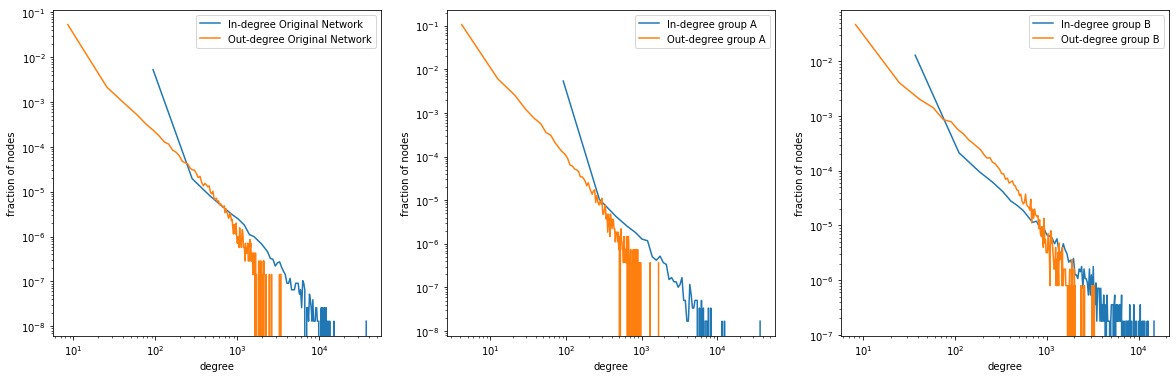

In [7]:
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
hist, bin_edges = np.histogram(in_degree_original, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
ax[0].plot(mean_bin_edges,hist, label='In-degree Original Network')
hist, bin_edges = np.histogram(out_degree_original, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
ax[0].plot(mean_bin_edges,hist, label='Out-degree Original Network')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('degree')
ax[0].set_ylabel('fraction of nodes')
ax[0].legend()

histA, bin_edgesA = np.histogram(in_degree_group_A, density=True, bins=200)
mean_bin_edgesA = [(bin_edgesA[i+1]+bin_edgesA[i])/2. for i in range(len(bin_edgesA)-1)] 
ax[1].plot(mean_bin_edgesA,histA, label='In-degree group A')
histA, bin_edgesA = np.histogram(out_degree_group_A, density=True, bins=200)
mean_bin_edgesA = [(bin_edgesA[i+1]+bin_edgesA[i])/2. for i in range(len(bin_edgesA)-1)] 
ax[1].plot(mean_bin_edgesA,histA, label='Out-degree group A')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('degree')
ax[1].set_ylabel('fraction of nodes')
ax[1].legend()

histB, bin_edgesB = np.histogram(in_degree_group_B, density=True, bins=200)
mean_bin_edgesB = [(bin_edgesB[i+1]+bin_edgesB[i])/2. for i in range(len(bin_edgesB)-1)] 
ax[2].plot(mean_bin_edgesB,histB, label='In-degree group B')
histB, bin_edgesB = np.histogram(out_degree_group_B, density=True, bins=200)
mean_bin_edgesB = [(bin_edgesB[i+1]+bin_edgesB[i])/2. for i in range(len(bin_edgesB)-1)] 
ax[2].plot(mean_bin_edgesB,histB, label='Out-degree group B')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('degree')
ax[2].set_ylabel('fraction of nodes')
ax[2].legend()
plt.savefig('../tutorial/plots/Figure1.png')

Here we use a set of well known functions to fit the in- and out-degree distributions for the whole network, group A and group B. The best fit is achieved by considering the minimum sumsquare error.

Fit of the in degree distribution for group A with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:10<00:00,  1.73s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000003,3.430949e+06,-8.233509e+06,0.002579,0.480937,0.0
powerlaw,0.000006,2.423971e+03,-7.993880e+06,inf,0.830653,0.0
pareto,0.000007,5.508808e+03,-7.922103e+06,inf,0.832442,0.0
levy,0.000007,6.243026e+03,-7.922115e+06,inf,0.655215,0.0
gamma,0.000007,2.361414e+06,-7.922102e+06,0.002754,0.983368,0.0


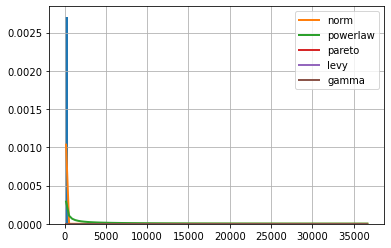

In [8]:
fA_in = Fitter(in_degree_group_A,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
fA_in.fit()
fA_in.summary() 

Fit of the in degree distribution for group B with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000028,92540.241401,-1.649488e+06,inf,0.455543,0.0
powerlaw,0.000033,2081.170124,-1.637555e+06,inf,0.711345,0.0
pareto,0.000039,3772.338092,-1.624951e+06,inf,0.635495,0.0
beta,0.000040,74404.325929,-1.624109e+06,inf,0.635495,0.0
levy,0.000043,5159.254262,-1.617475e+06,inf,0.525794,0.0


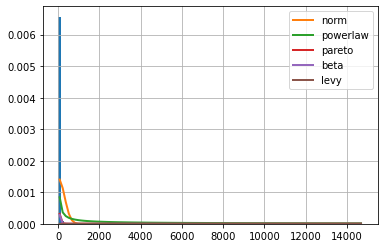

In [9]:
fB_in = Fitter(in_degree_group_B,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
fB_in.fit()
fB_in.summary()

Fit of the out degree distribution for group A with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.001506,210885.566121,-6.200894e+06,inf,0.397015,0.0
pareto,0.001637,2462.258445,-6.173839e+06,inf,0.323919,0.0
levy,0.001642,2108.855964,-6.172965e+06,inf,0.267165,0.0
beta,0.001782,59398.625551,-6.146478e+06,inf,0.313731,0.0
powerlaw,0.002338,1720.440290,-6.058709e+06,inf,0.416483,0.0


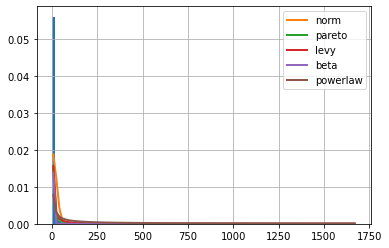

In [10]:
fA_out = Fitter(out_degree_group_A,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
fA_out.fit()
fA_out.summary()

Fit of the out degree distribution for group B with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000135,25930.696069,-1.530552e+06,inf,0.198167,0.0
pareto,0.000315,2427.643399,-1.466442e+06,inf,0.175646,0.0
levy,0.000348,2281.814813,-1.458816e+06,inf,0.195776,0.0
powerlaw,0.000466,1859.871139,-1.436591e+06,inf,0.352532,0.0
norm,0.000489,32450.637072,-1.433014e+06,inf,0.383930,0.0


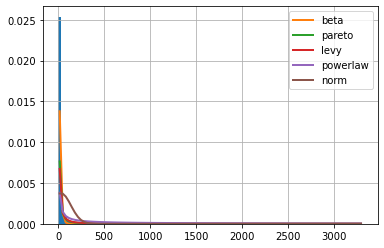

In [11]:
fB_out = Fitter(out_degree_group_B,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
fB_out.fit()
fB_out.summary()

Fit of the in degree distribution for the whole network with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:15<00:00,  2.52s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000002,1.654907e+06,-1.072613e+07,0.007014,0.474369,0.0
powerlaw,0.000005,2.267116e+03,-1.024542e+07,inf,0.794954,0.0
pareto,0.000007,5.151569e+03,-1.013432e+07,inf,0.737496,0.0
levy,0.000007,6.466421e+03,-1.013433e+07,inf,0.629234,0.0
beta,0.000007,8.927006e+05,-1.013430e+07,0.005356,0.780065,0.0


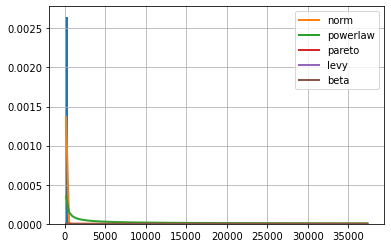

In [12]:
f_in_original = Fitter(in_degree_original,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
f_in_original.fit()
f_in_original.summary()

Fit of the out degree distribution for the whole network with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:15<00:00,  2.64s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pareto,0.000231,2557.146815,-8.705555e+06,inf,0.442846,0.0
norm,0.000440,136310.349012,-8.442617e+06,inf,0.419729,0.0
levy,0.000476,2313.713358,-8.410473e+06,inf,0.252393,0.0
beta,0.000490,56042.455296,-8.398401e+06,inf,0.284099,0.0
powerlaw,0.000567,1837.834711,-8.338810e+06,inf,0.493878,0.0


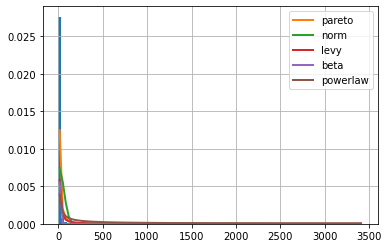

In [13]:
f_out_original = Fitter(out_degree_original,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
f_out_original.fit()
f_out_original.summary()

## Plots 1(a), ... , 1(f)

Here we consider a more reasonable y limit for the previous plots, we use a log scale for the axes and we save the corresponding figures.

Fit of the in degree distribution for group A with a set of 6 well knowm functions and with a reasonable y limit.

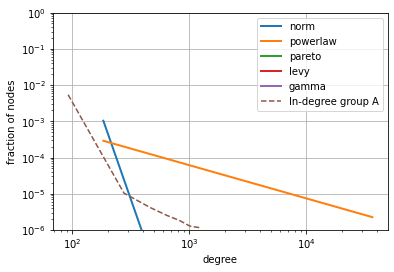

In [14]:
fA_in.plot_pdf()
hist, bin_edges = np.histogram(in_degree_group_A, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='In-degree group A')
plt.ylim(0.000001,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure1aInDegreeGroupA.png')

Fit of the out degree distribution for group A with a set of 6 well knowm functions and with a reasonable y limit.

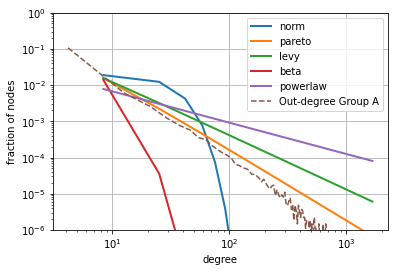

In [15]:
fA_out.plot_pdf()
hist, bin_edges = np.histogram(out_degree_group_A, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='Out-degree Group A')
plt.ylim(0.000001,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure1bOutDegreeGroupA.png')

Fit of the in degree distribution for group B with a set of 6 well knowm functions and with a reasonable y limit.

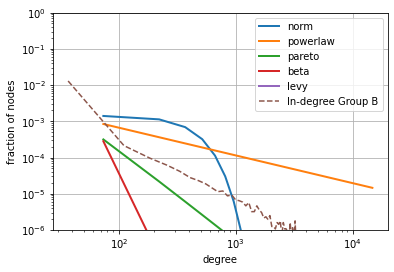

In [16]:
fB_in.plot_pdf()
hist, bin_edges = np.histogram(in_degree_group_B, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='In-degree Group B')
plt.ylim(0.000001,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure1cInDegreeGroupB.png')

Fit of the out degree distribution for group B with a set of 6 well knowm functions and with a reasonable y limit.

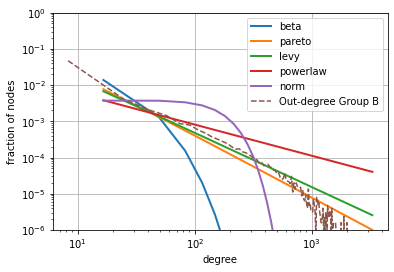

In [17]:
fB_out.plot_pdf()
hist, bin_edges = np.histogram(out_degree_group_B, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='Out-degree Group B')
plt.ylim(0.000001,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure1dOutDegreeGroupB.png')

Fit of the in degree distribution for the whole vaccine network with a set of 6 well knowm functions and with a reasonable y limit.

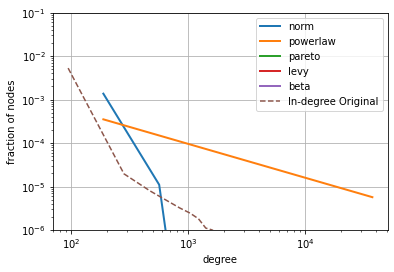

In [18]:
f_in_original.plot_pdf()
hist, bin_edges = np.histogram(in_degree_original, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='In-degree Original')
plt.ylim(0.000001,0.1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure1eInDegreeOriginal.png')

Fit of the out degree distribution for the whole vaccine network with a set of 6 well knowm functions and with a reasonable y limit.

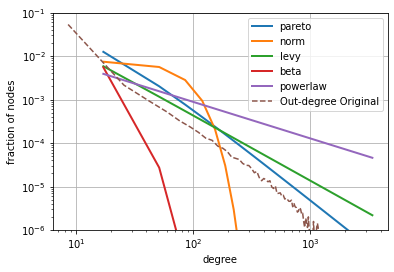

In [19]:
f_out_original.plot_pdf()
hist, bin_edges = np.histogram(out_degree_original, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='Out-degree Original')
plt.ylim(0.000001,0.1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure1fOutDegreeOriginal.png')

## Plot Figure 2.

Here we plot the in- and out-degree distributions for the war network

In [21]:
df_original = pd.read_csv("../data/degree_distribution_war/DegreeOriginal.csv")
in_degree_original = df_original['in_degree_original'].to_list()
out_degree_original = df_original['out_degree_original'].to_list()

In [22]:
df_degree_group_A = pd.read_csv("../data/degree_distribution_war/DegreeGroupA.csv")
in_degree_group_A = df_degree_group_A['in_degree_group_A'].to_list()
out_degree_group_A = df_degree_group_A['out_degree_group_A'].to_list() 

In [23]:
df_degree_group_B = pd.read_csv("../data/degree_distribution_war/DegreeGroupB.csv")
in_degree_group_B = df_degree_group_B['in_degree_group_B'].to_list()
out_degree_group_B = df_degree_group_B['out_degree_group_B'].to_list() 

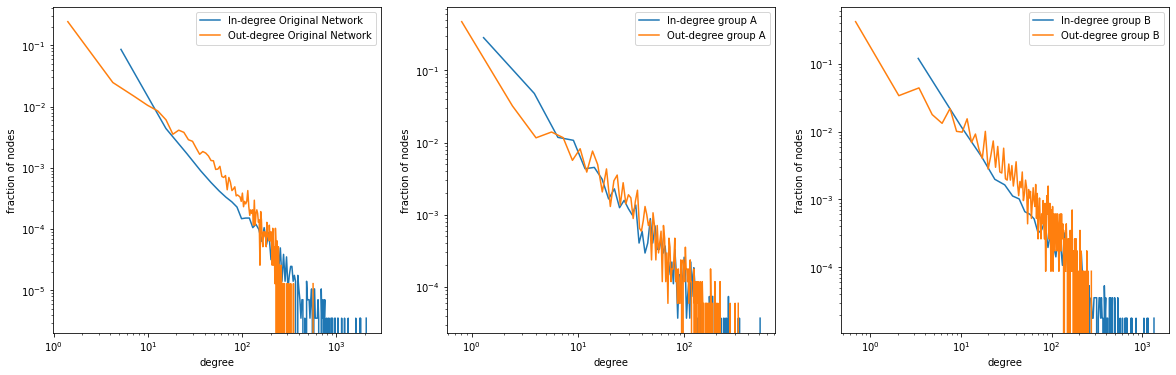

In [24]:
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
hist, bin_edges = np.histogram(in_degree_original, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
ax[0].plot(mean_bin_edges,hist, label='In-degree Original Network')
hist, bin_edges = np.histogram(out_degree_original, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
ax[0].plot(mean_bin_edges,hist, label='Out-degree Original Network')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('degree')
ax[0].set_ylabel('fraction of nodes')
ax[0].legend()

histA, bin_edgesA = np.histogram(in_degree_group_A, density=True, bins=200)
mean_bin_edgesA = [(bin_edgesA[i+1]+bin_edgesA[i])/2. for i in range(len(bin_edgesA)-1)] 
ax[1].plot(mean_bin_edgesA,histA, label='In-degree group A')
histA, bin_edgesA = np.histogram(out_degree_group_A, density=True, bins=200)
mean_bin_edgesA = [(bin_edgesA[i+1]+bin_edgesA[i])/2. for i in range(len(bin_edgesA)-1)] 
ax[1].plot(mean_bin_edgesA,histA, label='Out-degree group A')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('degree')
ax[1].set_ylabel('fraction of nodes')
ax[1].legend()

histB, bin_edgesB = np.histogram(in_degree_group_B, density=True, bins=200)
mean_bin_edgesB = [(bin_edgesB[i+1]+bin_edgesB[i])/2. for i in range(len(bin_edgesB)-1)] 
ax[2].plot(mean_bin_edgesB,histB, label='In-degree group B')
histB, bin_edgesB = np.histogram(out_degree_group_B, density=True, bins=200)
mean_bin_edgesB = [(bin_edgesB[i+1]+bin_edgesB[i])/2. for i in range(len(bin_edgesB)-1)] 
ax[2].plot(mean_bin_edgesB,histB, label='Out-degree group B')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('degree')
ax[2].set_ylabel('fraction of nodes')
ax[2].legend()
plt.savefig('../tutorial/plots/Figure2.png')

Here we use a set of well known functions to fit the in- and out-degree distributions for the whole network, group A and group B. The best fit is achieved by considering the minimum sumsquare error.

Fit of the in degree distribution for group A of the war network with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.002618,20707.857561,-160015.778968,inf,0.286841,0.0
pareto,0.005863,2335.860320,-151538.916853,inf,0.286841,0.0
levy,0.016450,1936.836063,-140689.542750,inf,0.395242,0.0
powerlaw,0.020140,1488.659889,-138550.213328,inf,0.375266,0.0
norm,0.020956,33615.446635,-138141.325652,inf,0.385885,0.0


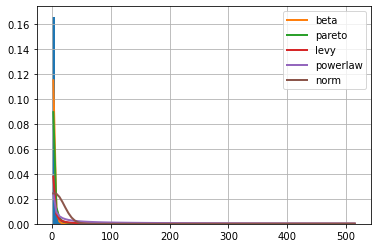

In [25]:
fA_in = Fitter(in_degree_group_A,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
fA_in.fit()
fA_in.summary() 

Fit of the in degree distribution for group B of the war network with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:00<00:00,  6.24it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000702,24535.681710,-135520.185773,inf,0.308460,0.0
pareto,0.001652,2588.003744,-128400.424841,inf,0.308460,0.0
powerlaw,0.003163,1680.623294,-122995.703040,inf,0.394041,0.0
levy,0.003348,2266.125569,-122531.083232,inf,0.428888,0.0
norm,0.003431,24687.920931,-122329.494137,inf,0.410631,0.0


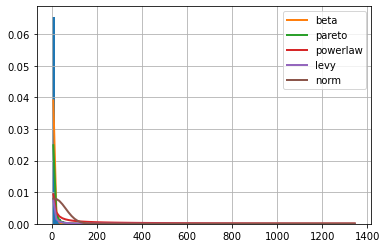

In [26]:
fB_in = Fitter(in_degree_group_B,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
fB_in.fit()
fB_in.summary()

Fit of the out degree distribution for group A of the war network with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:01<00:00,  4.12it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.031251,2345.238797,-133916.775761,inf,0.721805,0.0
powerlaw,0.046277,1353.578468,-129794.093977,inf,0.721800,0.0
gamma,0.053328,21946.498525,-128301.391931,inf,0.718509,0.0
norm,0.053923,12748.312495,-128194.037204,inf,0.388304,0.0
levy,0.064282,4950.555479,-126344.534948,inf,0.531147,0.0


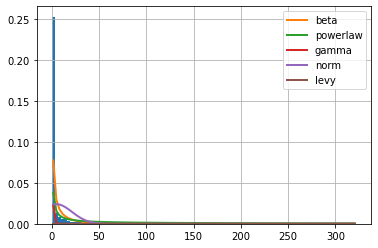

In [27]:
fA_out = Fitter(out_degree_group_A,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
fA_out.fit()
fA_out.summary()

Fit of the out degree distribution for group B of the war network with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.009710,4272.076225,-113652.526125,inf,0.505407,0.0
gamma,0.024351,1474.335061,-106010.346950,inf,0.505407,0.0
powerlaw,0.037978,1185.257717,-102311.938447,inf,0.546712,0.0
pareto,0.043869,2008.245172,-101111.823158,inf,0.434277,0.0
norm,0.045421,3839.039971,-100831.662921,inf,0.339405,0.0


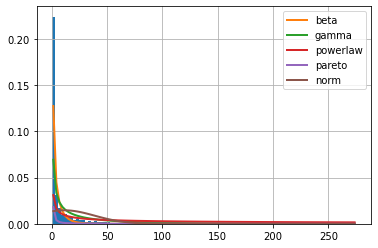

In [28]:
fB_out = Fitter(out_degree_group_B,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
fB_out.fit()
fB_out.summary()

Fit of the in degree distribution for the whole war network with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pareto,0.001373,2725.621799,-458801.443746,inf,0.288759,0.0
norm,0.001415,65020.489891,-457988.410510,inf,0.425425,0.0
beta,0.001506,47837.851414,-456276.625018,inf,0.293159,0.0
powerlaw,0.001555,1677.662895,-455415.359738,inf,0.660343,0.0
levy,0.001602,2349.424608,-454609.806493,inf,0.387621,0.0


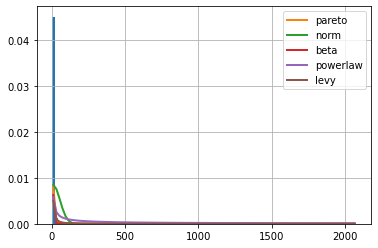

In [29]:
f_in_original = Fitter(in_degree_original,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
f_in_original.fit()
f_in_original.summary()

Fit of the out degree distribution for the whole war network with a set of 6 well knowm functions and corresponding sumsquare error.

Fitting 6 distributions: 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pareto,0.003367,2410.899247,-434319.188682,inf,0.599421,0.0
gamma,0.009050,2005.295059,-407323.508614,inf,0.599421,0.0
beta,0.009349,21512.658130,-406425.487373,inf,0.599420,0.0
powerlaw,0.012648,1466.740007,-398183.931970,inf,0.599416,0.0
norm,0.014460,16971.296477,-394537.924522,inf,0.362658,0.0


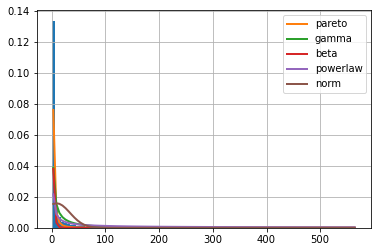

In [30]:
f_out_original = Fitter(out_degree_original,
               distributions=['gamma','beta','norm','levy','pareto','powerlaw'])
f_out_original.fit()
f_out_original.summary()

## Plots 2(a) ... 2(f)

Here we consider a more reasonable y limit for the previous plots, we use a log scale for the axes and we save the corresponding figures.

Fit of the in degree distribution for group A of the war network with a set of 6 well knowm functions and with a reasonable y limit.

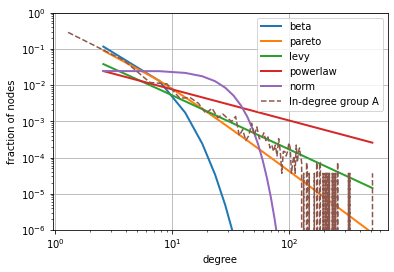

In [31]:
fA_in.plot_pdf()
hist, bin_edges = np.histogram(in_degree_group_A, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='In-degree group A')
plt.ylim(0.000001,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure2aInDegreeGroupAWar.png')

Fit of the out degree distribution for group A of the war network with a set of 6 well knowm functions and with a reasonable y limit.

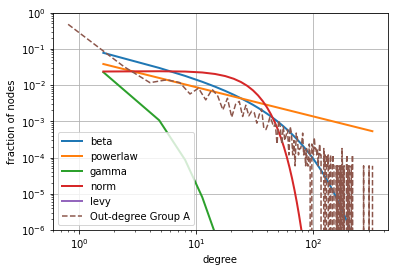

In [32]:
fA_out.plot_pdf()
hist, bin_edges = np.histogram(out_degree_group_A, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='Out-degree Group A')
plt.ylim(0.000001,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure2bOutDegreeGroupAWar.png')

Fit of the in degree distribution for group B of the war network with a set of 6 well knowm functions and with a reasonable y limit.

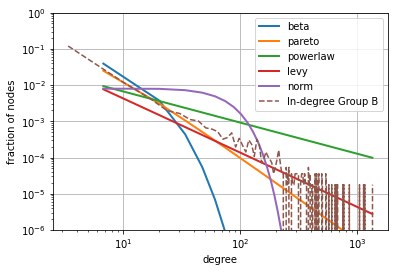

In [33]:
fB_in.plot_pdf()
hist, bin_edges = np.histogram(in_degree_group_B, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='In-degree Group B')
plt.ylim(0.000001,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure2cInDegreeGroupBWar.png')

Fit of the out degree distribution for group B of the war network with a set of 6 well knowm functions and with a reasonable y limit.

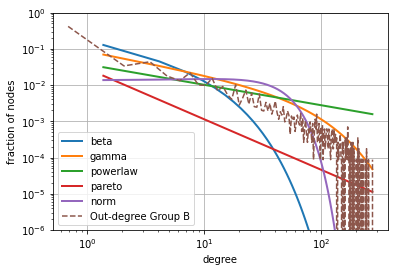

In [34]:
fB_out.plot_pdf()
hist, bin_edges = np.histogram(out_degree_group_B, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='Out-degree Group B')
plt.ylim(0.000001,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure2dOutDegreeGroupBWar.png')

Fit of the in degree distribution for the whole war network with a set of 6 well knowm functions and with a reasonable y limit.

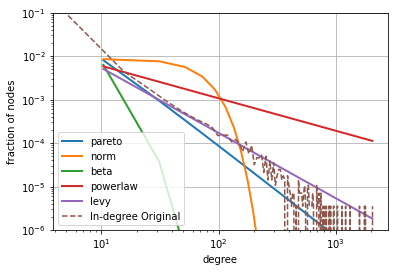

In [35]:
f_in_original.plot_pdf()
hist, bin_edges = np.histogram(in_degree_original, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='In-degree Original')
plt.ylim(0.000001,0.1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure2eInDegreeWarGraph.png')

Fit of the out degree distribution for the whole war network with a set of 6 well knowm functions and with a reasonable y limit.

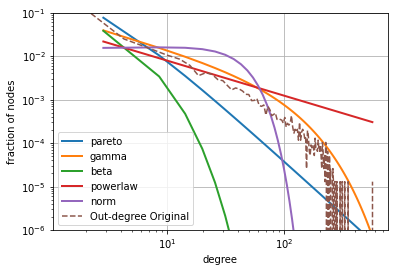

In [36]:
f_out_original.plot_pdf()
hist, bin_edges = np.histogram(out_degree_original, density=True, bins=200)
mean_bin_edges = [(bin_edges[i+1]+bin_edges[i])/2. for i in range(len(bin_edges)-1)] 
plt.plot(mean_bin_edges,hist, linestyle ='dashed', label='Out-degree Original')
plt.ylim(0.000001,0.1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.legend()
plt.savefig('../tutorial/plots/Fitting/Figure2fOutDegreeWarGraph.png')

## Plot Figure 3.

Here we plot the in- or -out degree as a function of the betweeness centrality: 
- in PanelA we represent the in-degree as a function of the betweeness for the (first) strong component;
- in PanelB we represent the out-degree as a function of the betweeness for the (first) strong component;
- in PanelC we represent the in-degree as a function of the betweeness for the (first) weak component;
- in PanelD we represent the out-degree as a function of the betweeness for the (first) weak component.

In [37]:
df_betweeness_panelA = pd.read_csv("../data/betweeness/PanelA.csv")
in_degree_panelA = df_betweeness_panelA['In-degree strong'].to_list()
betweeness_strong_panelA = df_betweeness_panelA['Betweeness strong'].to_list()

In [38]:
df_betweeness_panelB = pd.read_csv("../data/betweeness/PanelB.csv")
out_degree_panelB = df_betweeness_panelB['Out-degree strong'].to_list()
betweeness_strong_panelB = df_betweeness_panelB['Betweeness strong'].to_list()

In [39]:
df_betweeness_panelC = pd.read_csv("../data/betweeness/PanelC.csv")
in_degree_panelC = df_betweeness_panelC['In-degree weak'].to_list()
betweeness_weak_panelC = df_betweeness_panelC['Betweeness weak'].to_list()

In [40]:
df_betweeness_panelD = pd.read_csv("../data/betweeness/PanelD.csv")
out_degree_panelD = df_betweeness_panelD['Out-degree weak'].to_list()
betweeness_weak_panelD = df_betweeness_panelD['Betweeness weak'].to_list()

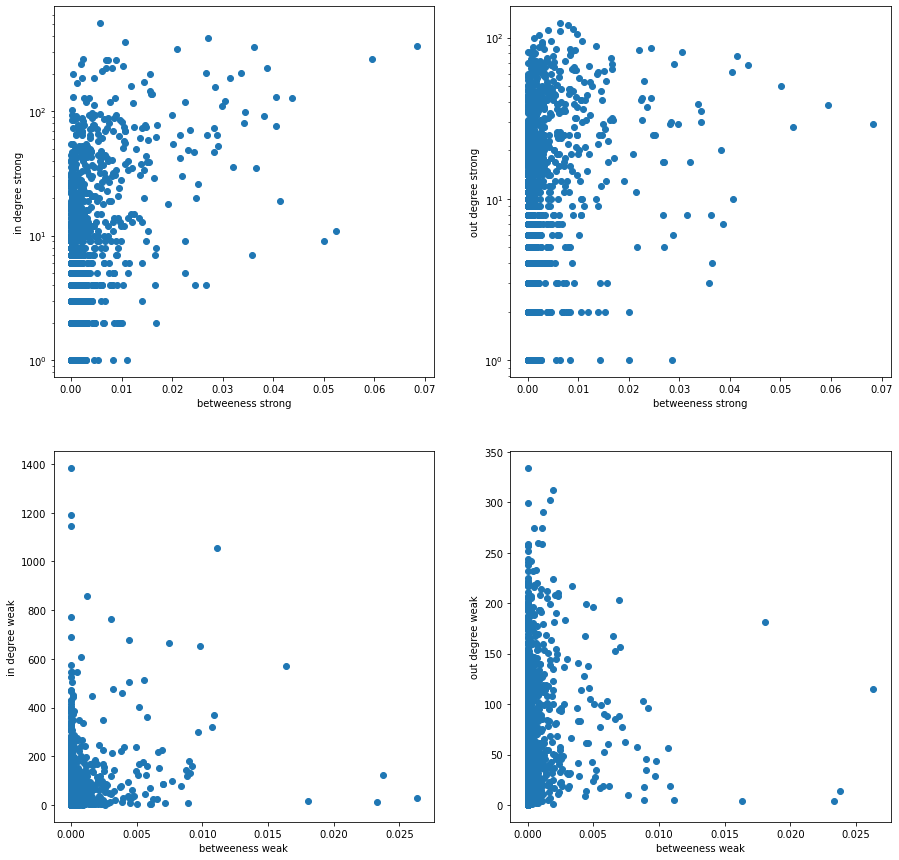

In [41]:
f,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,15))
ax[0][0].scatter(betweeness_strong_panelA,in_degree_panelA)
ax[0][0].set_yscale('log')
ax[0][0].set_xlabel('betweeness strong')
ax[0][0].set_ylabel('in degree strong')
ax[0][1].scatter(betweeness_strong_panelB,out_degree_panelB)
ax[0][1].set_yscale('log')
ax[0][1].set_xlabel('betweeness strong')
ax[0][1].set_ylabel('out degree strong')
ax[1][0].scatter(betweeness_weak_panelC,in_degree_panelC)
ax[1][0].set_xlabel('betweeness weak')
ax[1][0].set_ylabel('in degree weak')
ax[1][1].scatter(betweeness_weak_panelD,out_degree_panelD)
ax[1][1].set_xlabel('betweeness weak')
ax[1][1].set_ylabel('out degree weak')
plt.savefig('../tutorial/plots/Figure3.png')

## Plot Figure 4.

Plot of the clustering coefficient distribution.

In [42]:
df_clustering_distribution = pd.read_csv("../data/clustering_distribution/ClusteringDistribution.csv")
nodes = df_clustering_distribution['Nodes'].to_list()
clustering_coefficient = df_clustering_distribution['Clustering coefficient'].to_list()

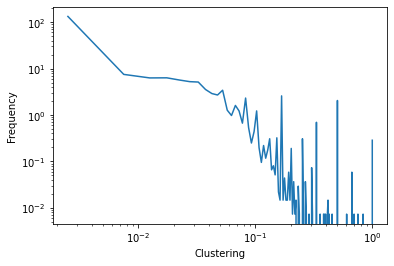

In [43]:
histC, bin_edgesC = np.histogram(clustering_coefficient, density=True, bins=200)
mean_bin_edgesC = [(bin_edgesC[i+1]+bin_edgesC[i])/2. for i in range(len(bin_edgesC)-1)] 
plt.xlabel('Clustering')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.plot(mean_bin_edgesC,histC, label='Clustering coefficient distribution')
plt.savefig('../tutorial/plots/Figure4.png')

## Plot Figure 5.

Plot of the in- and out-degree as a function of the clustering coefficient.

In [44]:
df_clust_indegree = pd.read_csv("../data/in_out_degree_vs_clustering/ClusteringInDegree.csv")
in_degree = df_clust_indegree['In-degree'].to_list()
clustering_coefficient1 = df_clust_indegree['Clustering coefficient'].to_list()

In [45]:
df_clust_outdegree = pd.read_csv("../data/in_out_degree_vs_clustering/ClusteringOutDegree.csv")
out_degree = df_clust_outdegree['Out-degree'].to_list()
clustering_coefficient2 = df_clust_indegree['Clustering coefficient'].to_list()

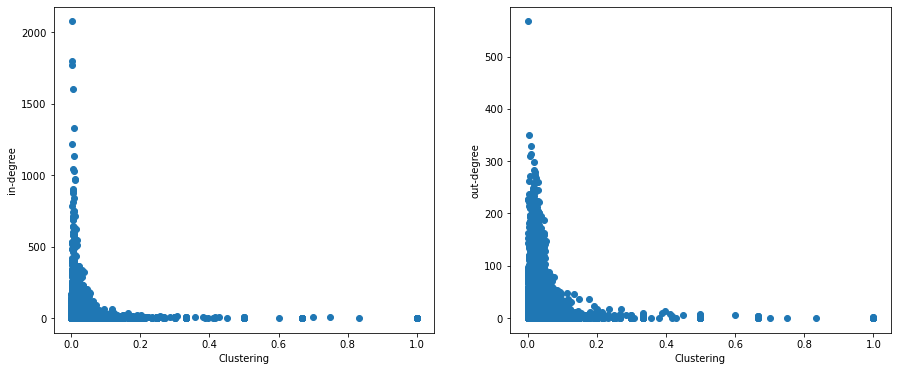

In [46]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax[0].scatter(clustering_coefficient1,in_degree)
ax[0].set_xlabel('Clustering')
ax[0].set_ylabel('in-degree')
ax[1].scatter(clustering_coefficient2,out_degree)
ax[1].set_xlabel('Clustering')
ax[1].set_ylabel('out-degree')
plt.savefig('../tutorial/plots/Figure5.png')

## Figure 6.

Plots of dimension of the first and second strongly connected components (1st), fraction of nodes belonging to group A (2nd) group B (3rd), given the dimension of the first and second strongly connected components. The last two plots are complementary.

In [47]:
df_components = pd.read_csv("../data/strongly_connected_components/Figure8.csv")
date_store = df_components['date_store'].to_list()
nodes_group_B_G0 = df_components['nodes_group_B_G0'].to_list()
nodes_group_A_G0 = df_components['nodes_group_A_G0'].to_list()
nodes_group_B_G1 = df_components['nodes_group_B_G1'].to_list()
nodes_group_A_G1 = df_components['nodes_group_A_G1'].to_list()

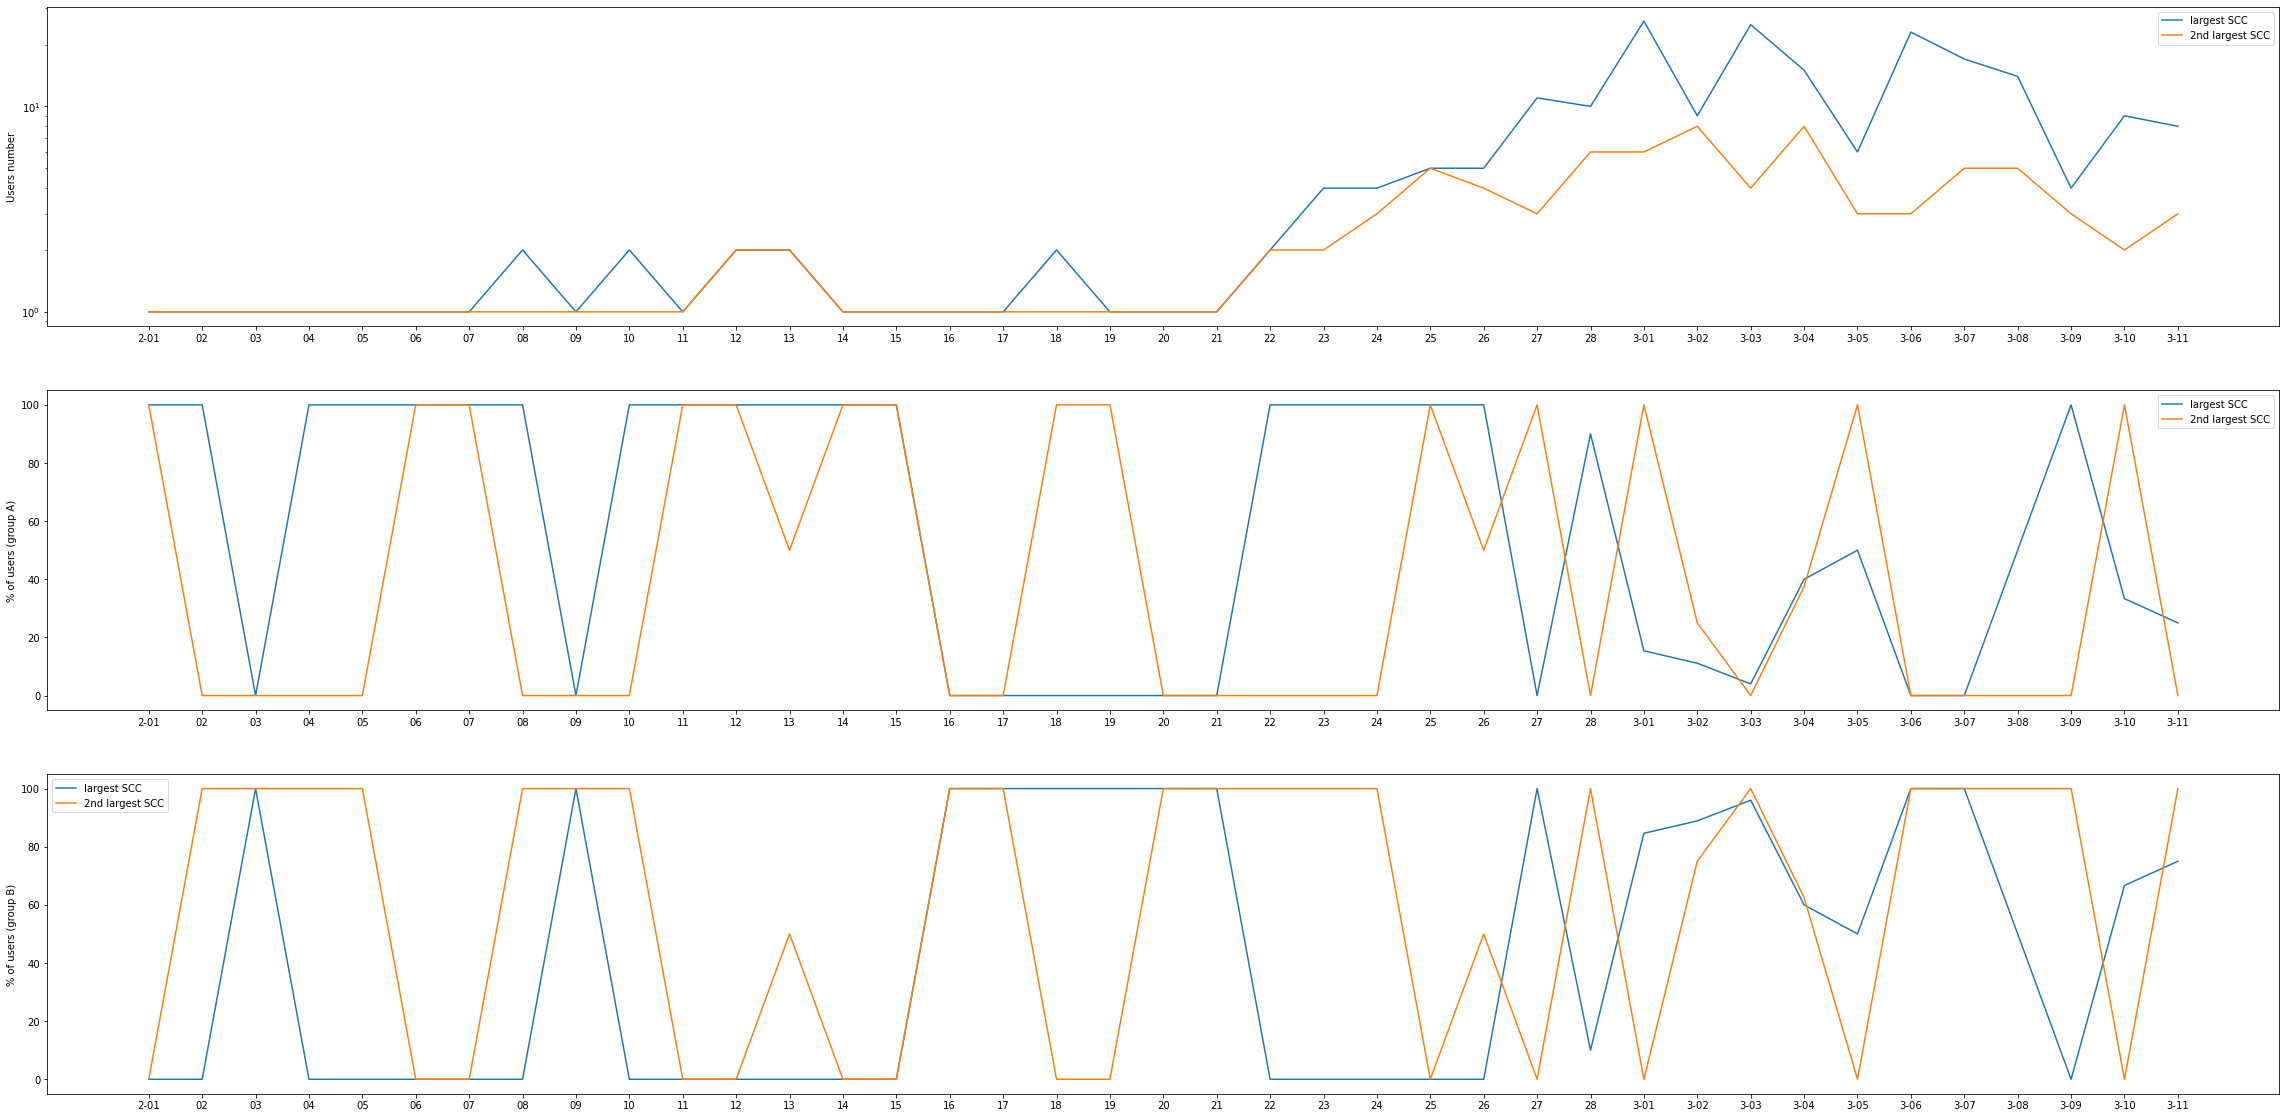

In [48]:
f,ax=plt.subplots(nrows=3,ncols=1,figsize=(40,20))

ax[0].plot(date_store,np.add(np.array(nodes_group_B_G0),np.array(nodes_group_A_G0)), label='largest SCC')
ax[0].plot(date_store,np.add(np.array(nodes_group_B_G1),np.array(nodes_group_A_G1)), label='2nd largest SCC')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_ylabel('Users number')

ax[1].plot(date_store,100*np.divide(np.array(nodes_group_A_G0),np.add(np.array(nodes_group_B_G0),np.array(nodes_group_A_G0))), 
           label='largest SCC')
ax[1].plot(date_store,100*np.divide(np.array(nodes_group_A_G1),np.add(np.array(nodes_group_B_G1),np.array(nodes_group_A_G1))), 
           label='2nd largest SCC')
ax[1].legend()
ax[1].set_ylabel('% of users (group A)')
ax[2].plot(date_store,100*np.divide(np.array(nodes_group_B_G0),np.add(np.array(nodes_group_B_G0),np.array(nodes_group_A_G0))), 
           label='largest SCC')
ax[2].plot(date_store,100*np.divide(np.array(nodes_group_B_G1),np.add(np.array(nodes_group_B_G1),np.array(nodes_group_A_G1))), 
           label='2nd largest SCC')
ax[2].legend()
ax[2].set_ylabel('% of users (group B)')
plt.savefig('../tutorial/plots/Figure6.png')

## Figure 7.

Plots of dimension of the first and second weakly connected components (1st), fraction of nodes belonging to group A (2nd) group B (3rd), given the dimension of the first and second weakly connected components. The last two plots are complementary.

In [49]:
df_components_weak = pd.read_csv("../data/weakly_connected_components/Figure9.csv")
date_store = df_components['date_store'].to_list()
nodes_group_B_G0_weak = df_components_weak['nodes_group_B_G0_weak'].to_list()
nodes_group_A_G0_weak = df_components_weak['nodes_group_A_G0_weak'].to_list()
nodes_group_B_G1_weak = df_components_weak['nodes_group_B_G1_weak'].to_list()
nodes_group_A_G1_weak = df_components_weak['nodes_group_A_G1_weak'].to_list()

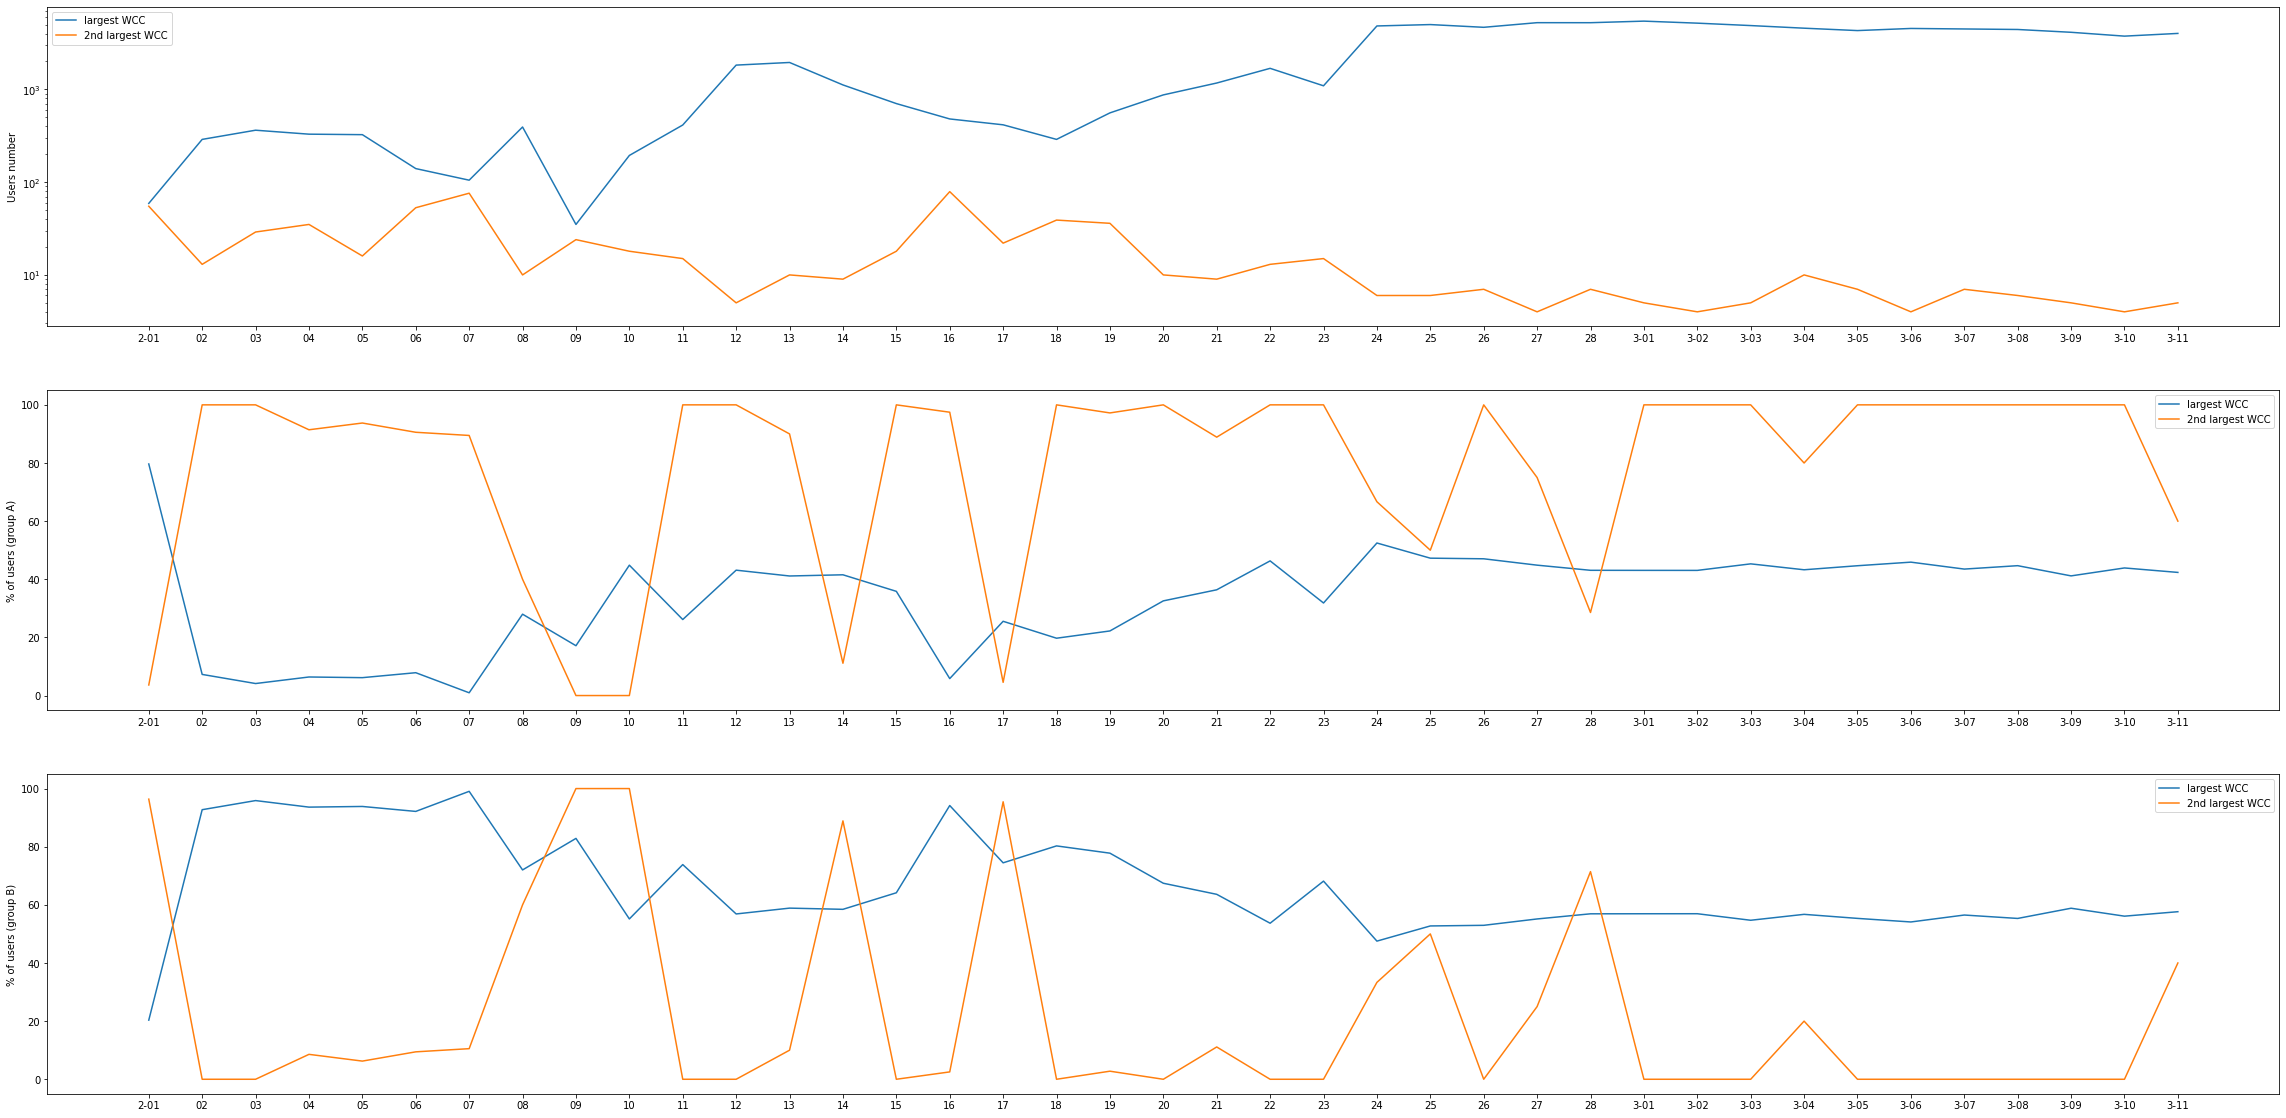

In [50]:
f,ax=plt.subplots(nrows=3,ncols=1,figsize=(40,20))

ax[0].plot(date_store,np.add(np.array(nodes_group_B_G0_weak),np.array(nodes_group_A_G0_weak)), label='largest WCC')
ax[0].plot(date_store,np.add(np.array(nodes_group_B_G1_weak),np.array(nodes_group_A_G1_weak)), label='2nd largest WCC')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_ylabel('Users number')
ax[1].plot(date_store,100*np.divide(np.array(nodes_group_A_G0_weak),np.add(np.array(nodes_group_B_G0_weak),np.array(nodes_group_A_G0_weak))), 
           label='largest WCC')
ax[1].plot(date_store,100*np.divide(np.array(nodes_group_A_G1_weak),np.add(np.array(nodes_group_B_G1_weak),np.array(nodes_group_A_G1_weak))), 
           label='2nd largest WCC')
ax[1].legend()
ax[1].set_ylabel('% of users (group A)')
ax[2].plot(date_store,100*np.divide(np.array(nodes_group_B_G0_weak),np.add(np.array(nodes_group_B_G0_weak),np.array(nodes_group_A_G0_weak))), 
           label='largest WCC')
ax[2].plot(date_store,100*np.divide(np.array(nodes_group_B_G1_weak),np.add(np.array(nodes_group_B_G1_weak),np.array(nodes_group_A_G1_weak))), 
           label='2nd largest WCC')
ax[2].legend()
ax[2].set_ylabel('% of users (group B)')
plt.savefig('../tutorial/plots/Figure7.png')

## Figure 8.

Plot of the assortativity coefficient day by day compared with the assortativity value for the static network.

In [51]:
df_assortativity = pd.read_csv("../data/assortativity/Figure10.csv")
date_store = df_assortativity['date_store'].to_list()
assortativity_values = df_assortativity['assortativity_values'].to_list()

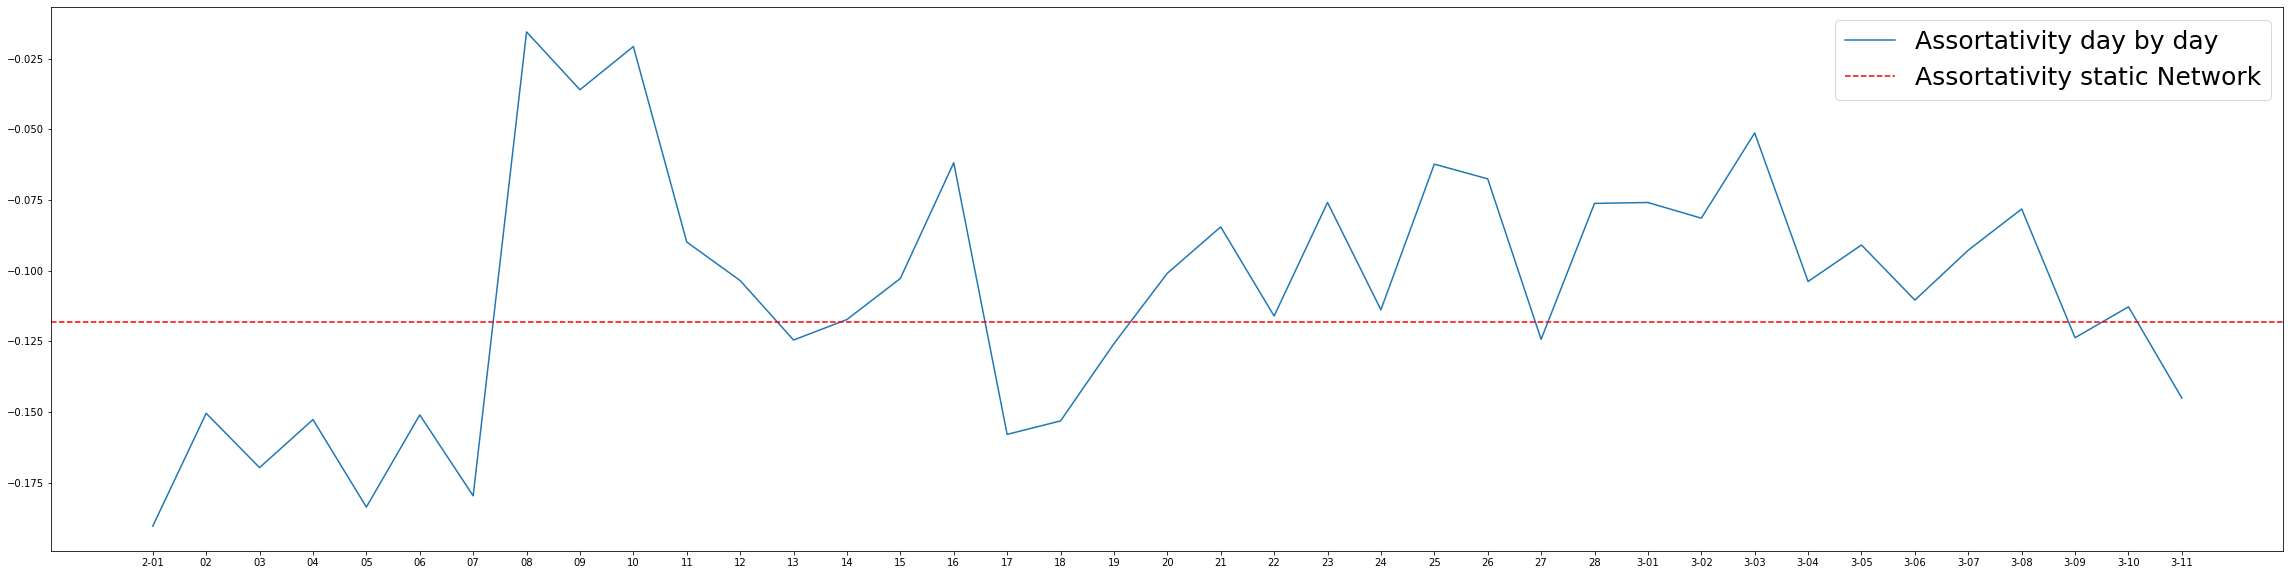

In [52]:
plt.rcParams["figure.figsize"] = (40, 10)
plt.plot(date_store,assortativity_values, label='Assortativity day by day')
plt.axhline(y = -0.11828309144717714, color = 'r', linestyle = '--', label='Assortativity static Network')
plt.legend(loc='upper right',prop={'size': 25})
plt.savefig('../tutorial/plots/Figure8.png')

## Figure 9.

Plot of the Gini index day by day for the in- and out-degree distributions compared with the corresponding values for the static network. 

In [54]:
df_gini = pd.read_csv("../data/gini_index/Figure11.csv")
date_store = df_gini['date_store'].to_list()
Gini_in_values = df_gini['Gini_in_values'].to_list()
Gini_out_values = df_gini['Gini_out_values'].to_list()

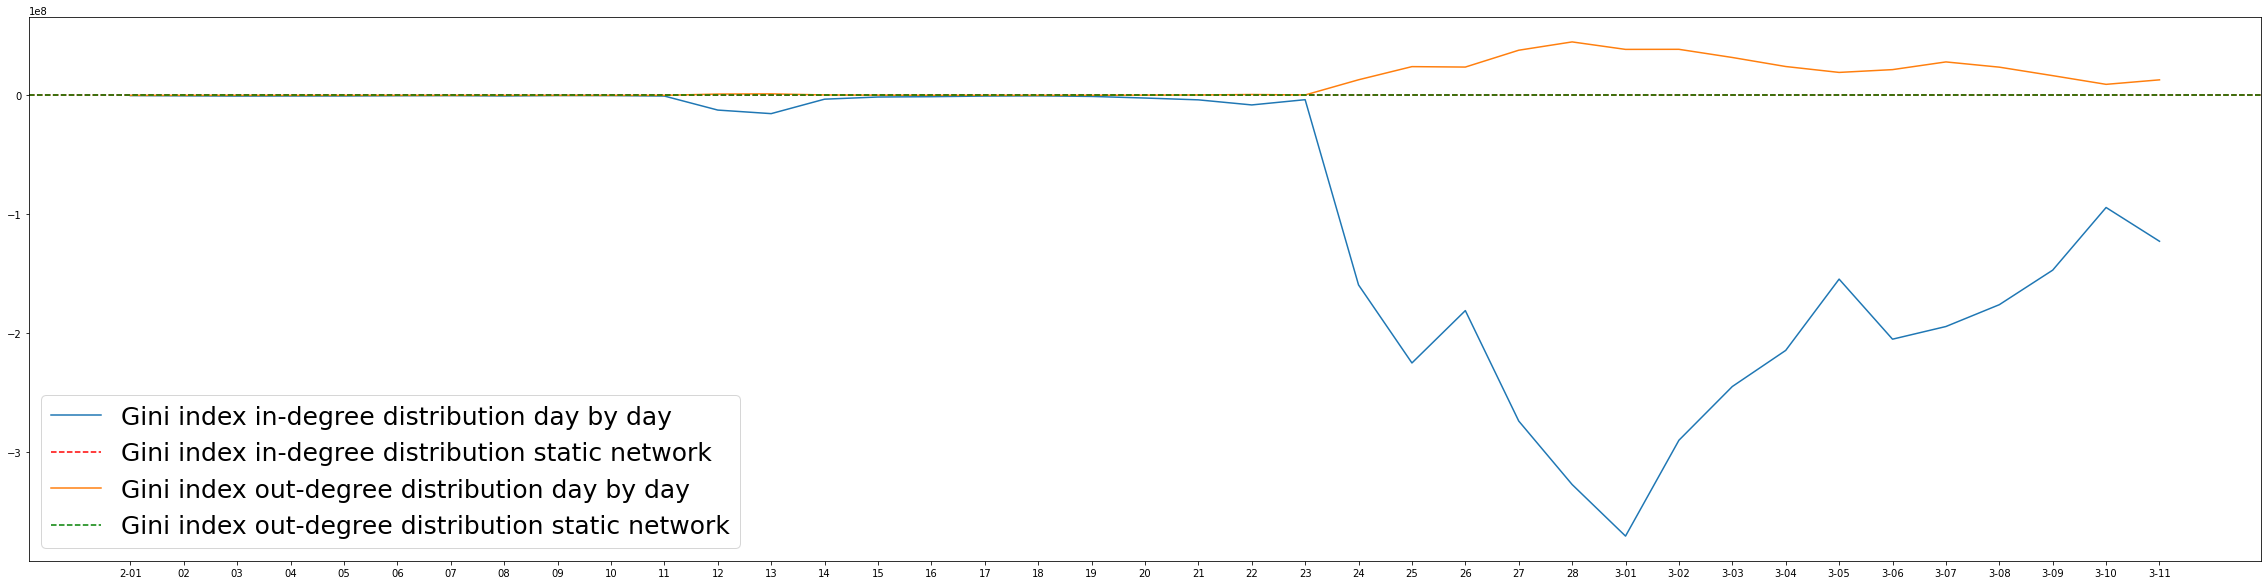

In [55]:
plt.plot(date_store,Gini_in_values, label='Gini index in-degree distribution day by day')
plt.axhline(y = 0.8627431559837014, color = 'r', linestyle = '--', label='Gini index in-degree distribution static network')
plt.plot(date_store,Gini_out_values, label='Gini index out-degree distribution day by day')
plt.axhline(y = 0.9552311938628864, color = 'g', linestyle = '--', label='Gini index out-degree distribution static network')
plt.legend(loc='best',prop={'size': 25})
plt.savefig('../tutorial/plots/Figure9.png')

## Figure 10.

Here we plot the number of nodes belonging to our war network day by day (1st) and the fraction of nodes belonging to group A or to group B day by day, that are present in the war network, but that belong also to the vaccine network.

In [56]:
df_n_of_nodes = pd.read_csv("../data/number_of_nodes_AB/Figure12.csv")
date_store = df_n_of_nodes['date_store'].to_list()
nodes_group_A = df_n_of_nodes['nodes_group_A'].to_list()
nodes_group_B = df_n_of_nodes['nodes_group_B'].to_list()
nodes_original = df_n_of_nodes['nodes_original'].to_list()

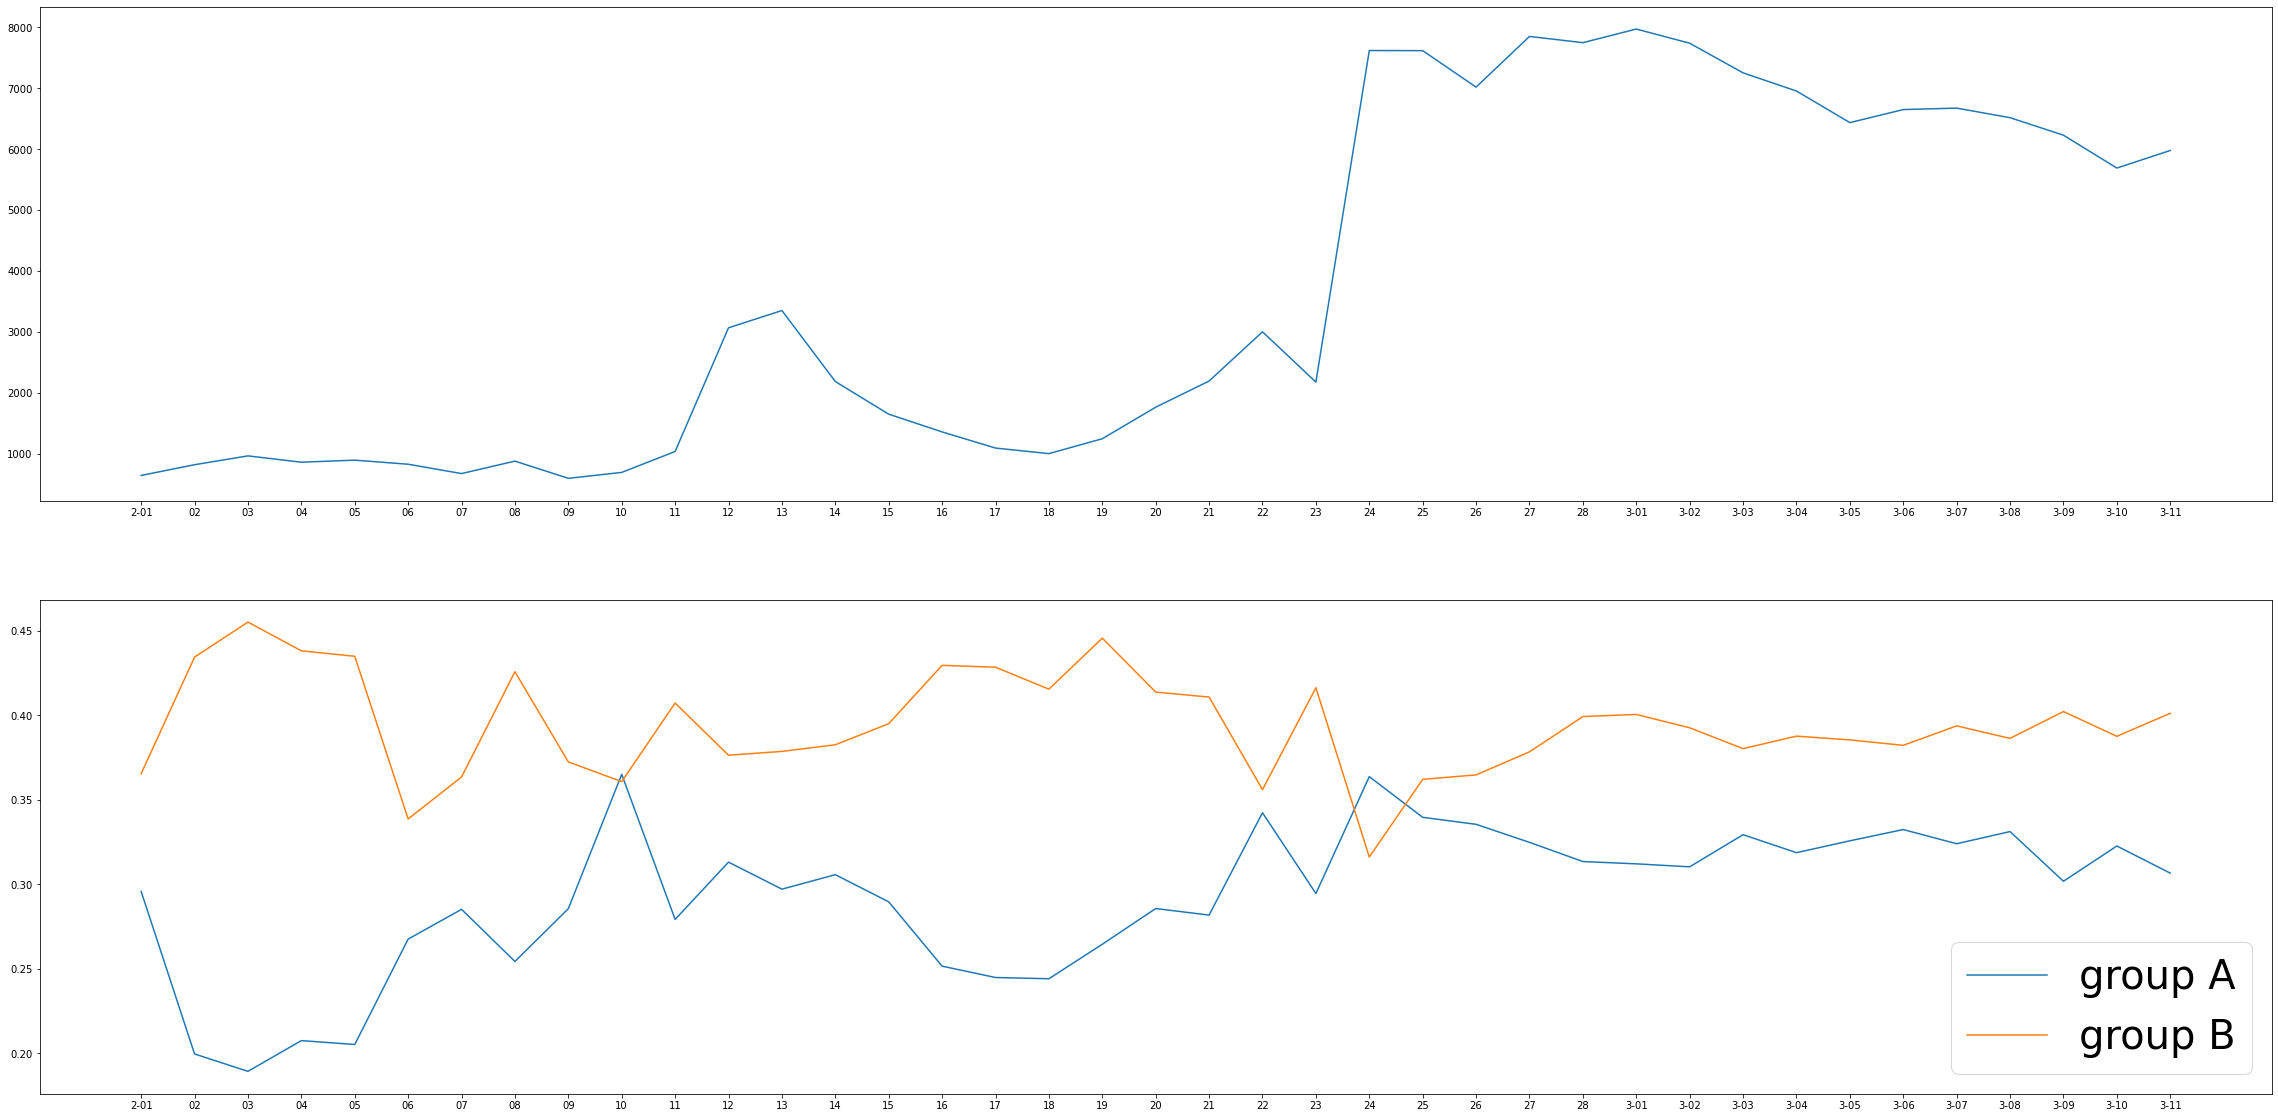

In [57]:
f,ax=plt.subplots(nrows=2,ncols=1,figsize=(40,20)) 
ax[0].plot(date_store,nodes_original)
ax[1].plot(date_store,np.divide(np.array(nodes_group_A),np.array(nodes_original)), label='group A')
ax[1].plot(date_store,np.divide(np.array(nodes_group_B),np.array(nodes_original)),label='group B')
ax[1].legend(loc='best',prop={'size': 40})
plt.savefig('../tutorial/plots/Figure10.png')

## Figure 11.

Plot representing a comparison of modularity day by day between the real network and the shuffled one.

In [58]:
df_modularity = pd.read_csv("../data/modularity/Figure13.csv")
date_store = df_modularity['date_store'].to_list()
mod_weighted_file = df_modularity['mod_weighted_file'].to_list()
random_mod_weighted_file = df_modularity['random_mod_weighted_file'].to_list()

In [59]:
random_mod_weighted_file = [ast.literal_eval(value) for value in random_mod_weighted_file]
#we use this function from the imported ast library as a consequence of a pandas problem: when we save
#and read the file the type is not interpreted correctly: e.g. random_mod_weighted_file[0] should be a
#list, but since it is saved in a file, it is interpreted as a string. The function used helps to 
#interpret the correct type.

In [60]:
mean_random_mod_weighted_file=np.mean(random_mod_weighted_file, axis=1)
std_random_mod_weighted_file=np.std(random_mod_weighted_file, axis =1)

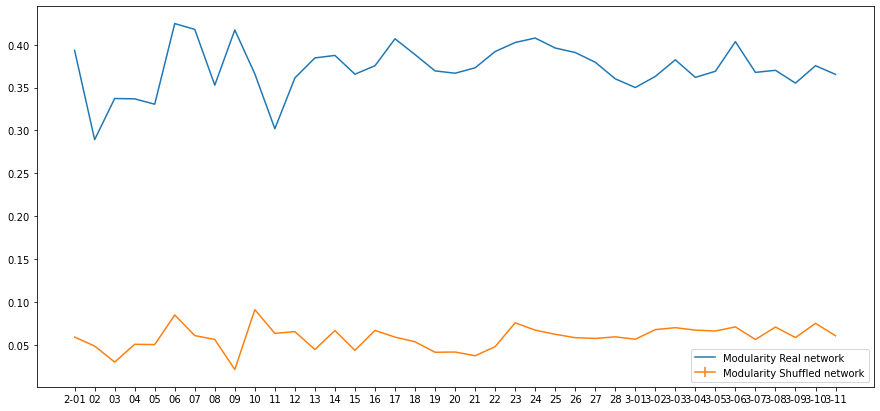

In [61]:
plt.figure(figsize=(15,7))
plt.plot(date_store,mod_weighted_file,label='Modularity Real network')
plt.errorbar(x=np.arange(0,len(mod_weighted_file)),
             y=mean_random_mod_weighted_file,yerr=std_random_mod_weighted_file, label='Modularity Shuffled network')
plt.legend(loc='best',prop={'size': 10})
plt.savefig('../tutorial/plots/Figure11.png')

## Figure 12.

Plot representing the average age of activity day-by-day considering separetely the in- and out-distributions, in other terms it is the plot of the average age of activity of users who receive a retweet (in-degree) and of users who retweets (out-degree).

In [62]:
df_age = pd.read_csv("../data/age/Figure14.csv")
date_store = df_age['date_store'].to_list()
nodes_age_in = df_age['nodes_age_in'].to_list()
nodes_age_out = df_age['nodes_age_out'].to_list()

In [63]:
#we use the function in ast library as in Figure 11.
nodes_age_in = [ast.literal_eval(value) for value in nodes_age_in]
nodes_age_out = [ast.literal_eval(value) for value in nodes_age_out]

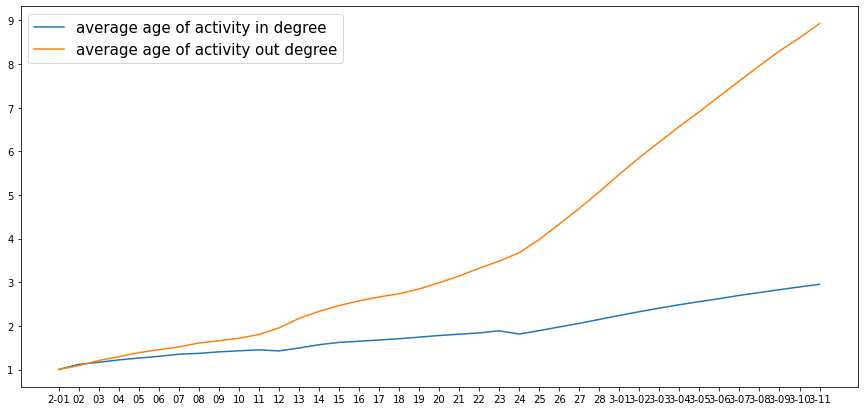

In [64]:
plt.figure(figsize=(15,7))
plt.plot(date_store,[np.mean(list(age.values())) for age in nodes_age_in], label='average age of activity in degree')
plt.plot(date_store,[np.mean(list(age.values())) for age in nodes_age_out], label='average age of activity out degree')
plt.legend(loc='best',prop={'size': 15})
plt.savefig('../tutorial/plots/Figure12.png')

## Figure 13.

Here we plot the the behaviour of the frequency of the mostly 10 words used in group A and group B.

In [65]:
df_frequencyA = pd.read_csv("../data/frequency/Figure15_1.csv")
df_frequencyB = pd.read_csv("../data/frequency/Figure15_2.csv")
key_list = df_frequencyA['key_list'].to_list()
key_listB = df_frequencyB['key_listB'].to_list()
values_list = df_frequencyA['values_list'].to_list()
values_listB = df_frequencyB['values_listB'].to_list()

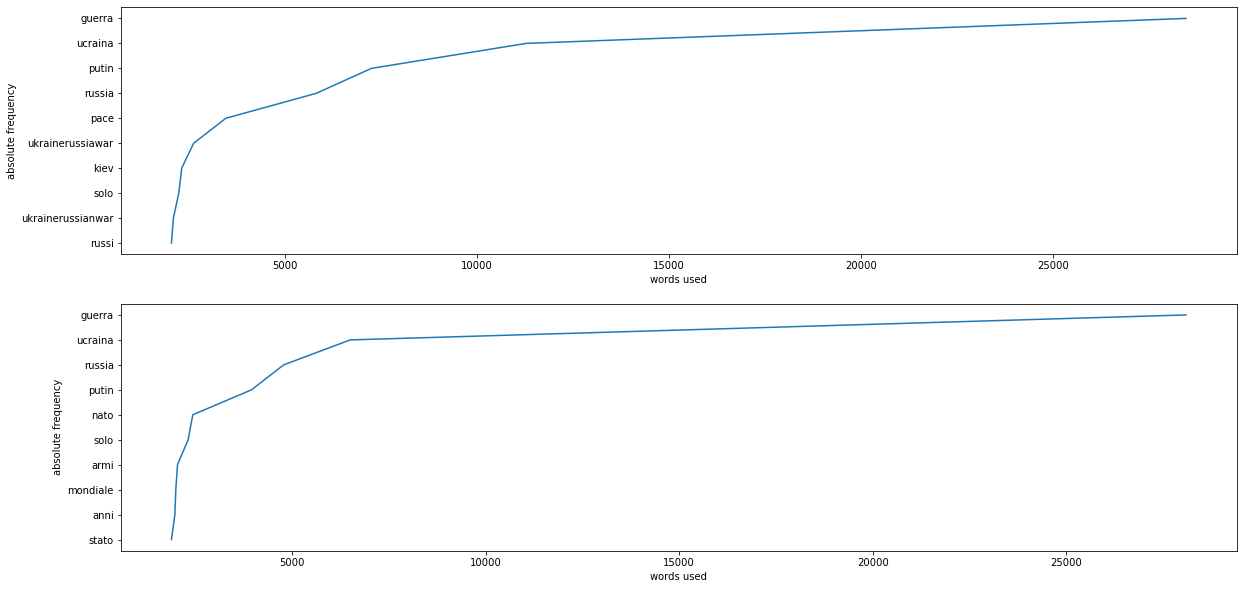

In [66]:
f,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,10), squeeze=False)
ax[0][0].plot(key_list[-10:],values_list[-10:])
ax[0][0].set_xlabel('words used')
ax[0][0].set_ylabel('absolute frequency')

ax[1][0].plot(key_listB[-10:],values_listB[-10:])
ax[1][0].set_xlabel('words used')
ax[1][0].set_ylabel('absolute frequency')
plt.savefig('../tutorial/plots/Figure13.png')

## Plot 14.

Plot of the total number of retweets over the period considered.

/home/STUDENTI/pasqualino.dipilla/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


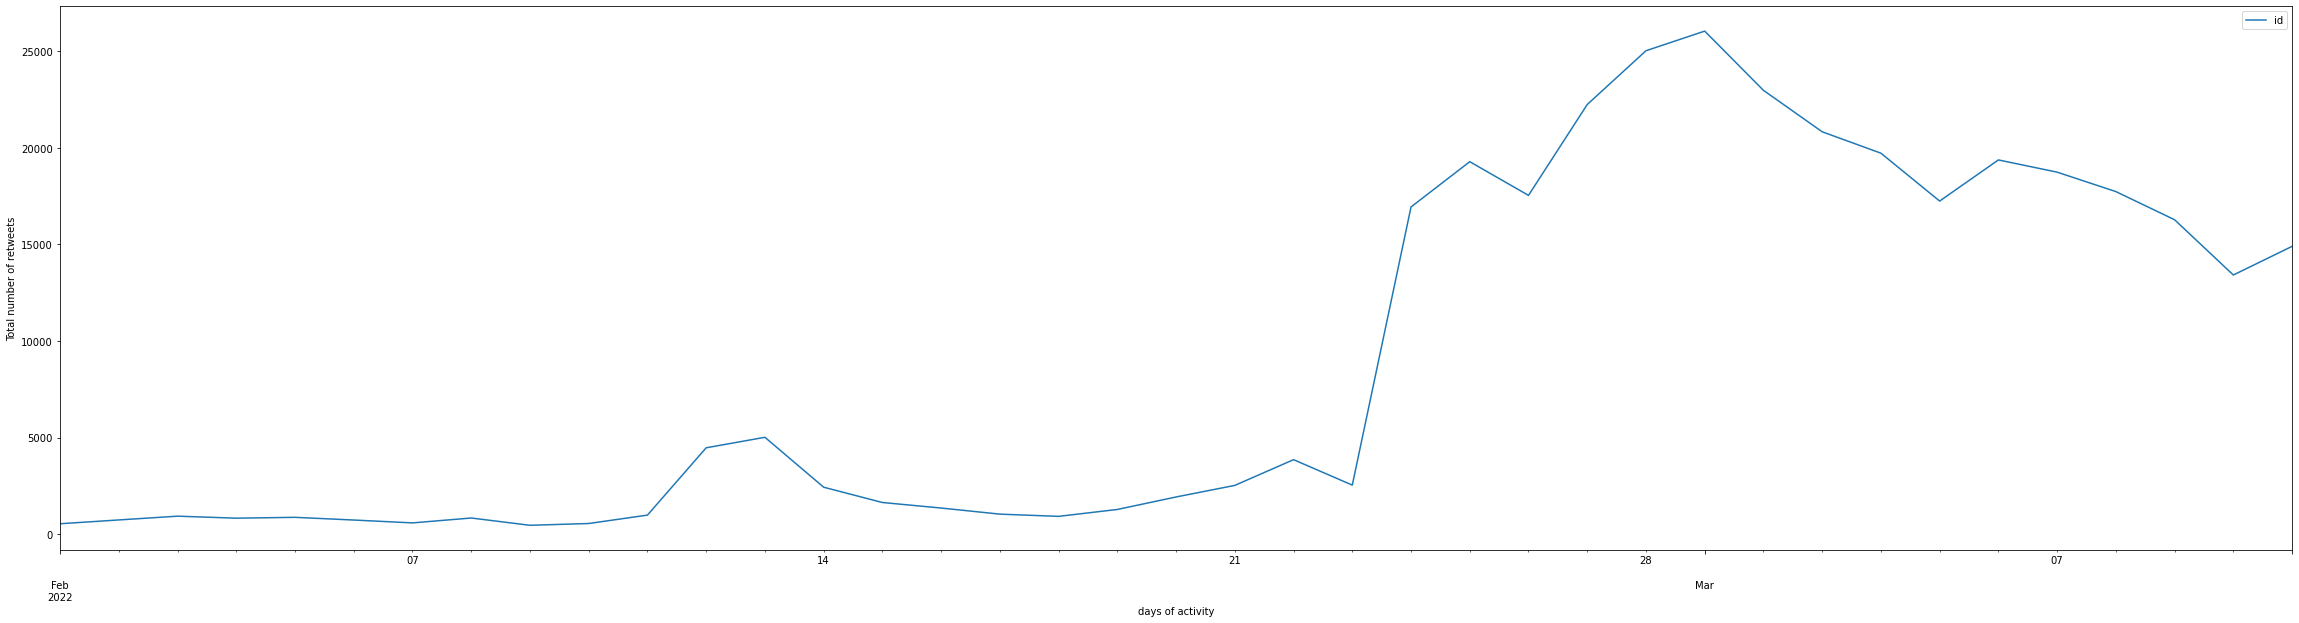

In [67]:
df = pd.read_csv("../data/frequency/totalNofRetweets.csv.gz")
df['created_at_days'] = pd.to_datetime(df['created_at_days'])
df[df['created_at_days']<(df['created_at_days'].max()-pd.Timedelta('1 days'))].groupby('created_at_days').count().plot(y='id')
plt.xlabel('days of activity')
plt.ylabel('Total number of retweets')
plt.savefig('../tutorial/plots/Figure14_totalNofRetweets.png')

## Plot 15.

Plot of the behaviour over time of the fraction of retweets in group A and group B with respect to the total number of retweets.

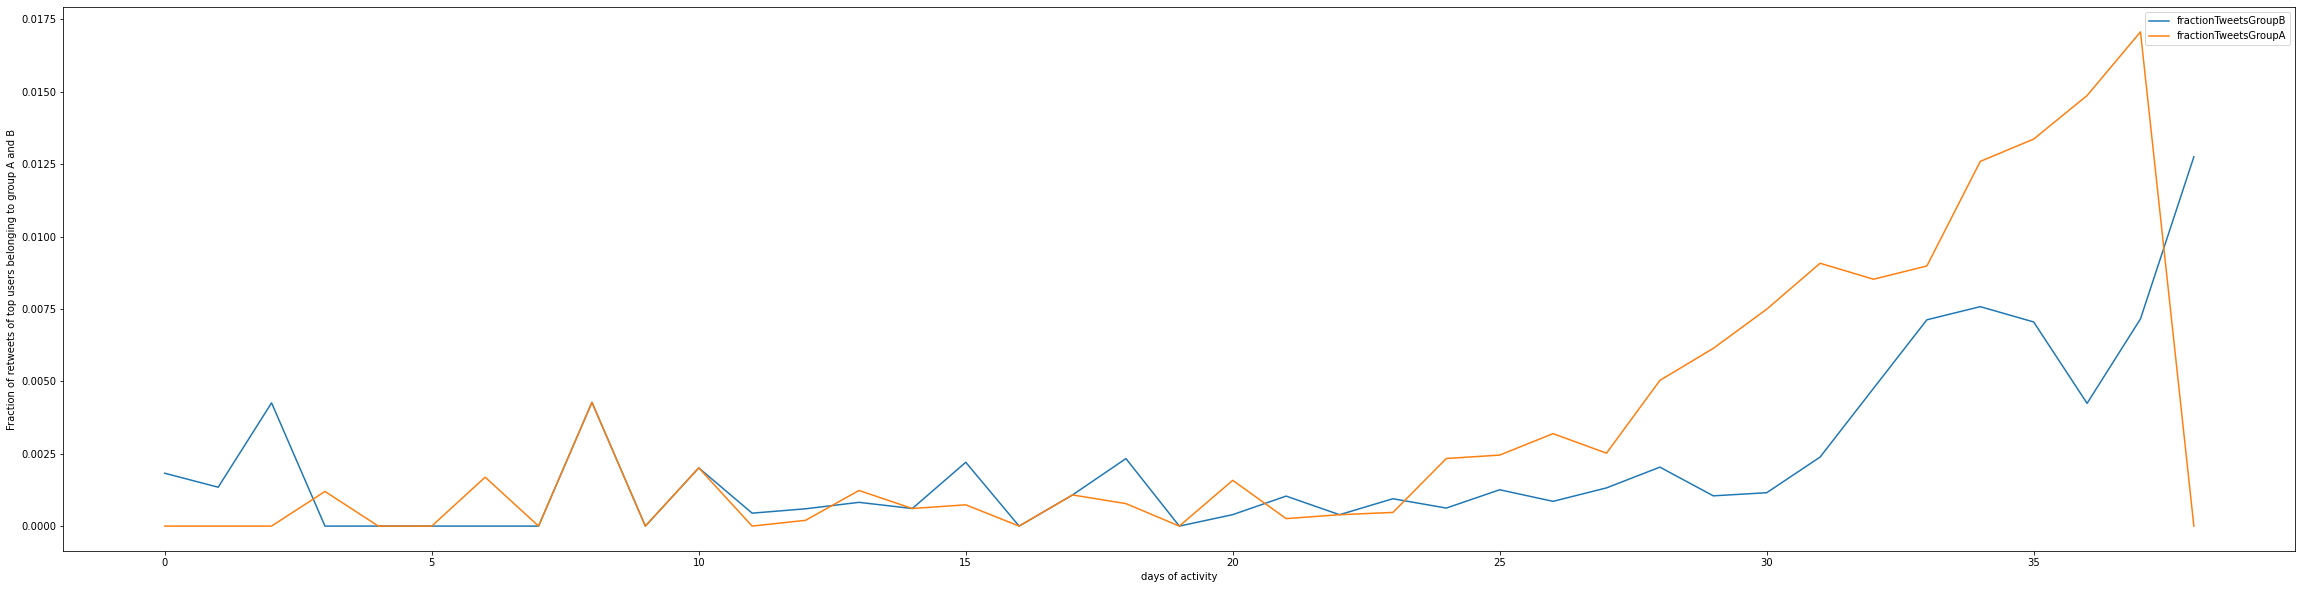

In [68]:
df5 = pd.read_csv("../data/frequency/Fraction.csv")
df5.plot(y=['fractionTweetsGroupB','fractionTweetsGroupA'])
plt.xlabel('days of activity')
plt.ylabel('Fraction of retweets of top users belonging to group A and B')
plt.savefig('../tutorial/plots/Figure15_FractionAB.png')